# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

In [3]:
print(cities)

['kapaa', 'panguna', 'saskylakh', 'bredasdorp', 'ostrovnoy', 'luzhany', 'bur gabo', 'necochea', 'puerto ayora', 'albany', 'arraial do cabo', 'qaanaaq', 'talara', 'port alfred', 'louisbourg', 'namibe', 'vaitupu', 'gizo', 'avera', 'khatanga', 'butaritari', 'busselton', 'pacific grove', 'makasar', 'qinhuangdao', 'rikitea', 'saint-philippe', 'tarsus', 'souillac', 'chokurdakh', 'isangel', 'puerto colombia', 'samusu', 'hihifo', 'port hardy', 'airai', 'birjand', 'faya', 'hambantota', 'provideniya', 'praia da vitoria', 'thompson', 'iqaluit', 'vaini', 'wladyslawowo', 'taolanaro', 'marshall', 'lerwick', 'puerto escondido', 'hobart', 'praia', 'haines junction', 'mataura', 'tiksi', 'gasa', 'punta arenas', 'zhezkazgan', 'the valley', 'khuzdar', 'prince george', 'hithadhoo', 'chagda', 'alotau', 'hermanus', 'chuy', 'makakilo city', 'bluff', 'jamestown', 'port elizabeth', 'katsuura', 'grand river south east', 'lebu', 'krasnyy chikoy', 'new norfolk', 'port lincoln', 'castro', 'ilulissat', 'ialibu', 'hi

In [3]:
city=cities
df=pd.DataFrame(city)
df=df.rename(columns={0:'city'})

df['lat'] = ""
df['long'] = ""
df['temp'] = ""
df['humidity'] = ""
df['cloudiness'] = ""
df['windspeed'] = ""
df["country"] = ""
df["date"] = ""
df

,city,lat,long,temp,humidity,cloudiness,windspeed,country,date
0,klaksvik,,,,,,,,
1,nemuro,,,,,,,,
2,hamilton,,,,,,,,
3,atuona,,,,,,,,
4,ushuaia,,,,,,,,
...,...,...,...,...,...,...,...,...,...
620,maceio,,,,,,,,
621,labytnangi,,,,,,,,
622,kirakira,,,,,,,,
623,matara,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [46]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"
api_key = weather_api_key

query_url = f"{url}appid={api_key}&units={units}&q="


In [30]:
# city="kapaa"
# query_url = f"{url}appid={api_key}&units={units}&q="
# response=requests.get(query_url + city)
# response_json = response.json()



In [36]:
# pprint(response_json)
# country=response_json['sys']['country']
# date=response_json["dt"]


{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 22.0752, 'lon': -159.319},
 'dt': 1621164663,
 'id': 5848280,
 'main': {'feels_like': 70.93,
          'humidity': 73,
          'pressure': 1021,
          'temp': 70.74,
          'temp_max': 73.4,
          'temp_min': 68},
 'name': 'Kapaa',
 'rain': {'1h': 0.25},
 'sys': {'country': 'US',
         'id': 7873,
         'sunrise': 1621180641,
         'sunset': 1621228210,
         'type': 1},
 'timezone': -36000,
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 40, 'speed': 19.57}}


In [37]:
# print(country)
# print(date)

US
1621164663


In [54]:
count = 0
set_ctr=1

print("Beginning Record Retrieval")
print("-------------------------------")

for i, row in df.iterrows():
    time.sleep(5)
    city=row[0]
    response = requests.get(query_url + city).json()
     
    try:
        lat = response['coord']['lat']
        long = response['coord']['lon']
        temp = response['main']['temp']
        humidity = response['main']['humidity']
        cloudiness = response['clouds']['all']
        windspeed = response['wind']['speed']
        country = response['sys']['country']
        date = response['dt']
        
        df.loc[i, "lat"] = lat
        df.loc[i, "long"] = long
        df.loc[i, "temp"] = temp
        df.loc[i, "humidity"] = humidity
        df.loc[i, "cloudiness"] = cloudiness
        df.loc[i, "windspeed"] = windspeed
        df.loc[i, "country"] = country
        df.loc[i, "date"] = date
        
        print(f"Processing Record {count} of Set {set_ctr} | {city}")
        if count == 50:
            count = 0
            set_ctr += 1
        else:
            count += 1
    except:
        print(f"City not found. Skipping")
        if count == 50:
            count = 0
            set_ctr += 1
        else:
            count += 1

print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")
           


Beginning Record Retrieval
-------------------------------
Processing Record 0 of Set 1 | kapaa
Processing Record 1 of Set 1 | panguna
Processing Record 2 of Set 1 | saskylakh
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | ostrovnoy
Processing Record 5 of Set 1 | luzhany
City not found. Skipping
Processing Record 7 of Set 1 | necochea
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | talara
Processing Record 13 of Set 1 | port alfred
City not found. Skipping
Processing Record 15 of Set 1 | namibe
City not found. Skipping
Processing Record 17 of Set 1 | gizo
Processing Record 18 of Set 1 | avera
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | pacific grove
Processing Record 23 of Set 1 | makasar
Processi

Processing Record 2 of Set 5 | manali
Processing Record 3 of Set 5 | san patricio
Processing Record 4 of Set 5 | ribeira grande
Processing Record 5 of Set 5 | shetpe
Processing Record 6 of Set 5 | awassa
Processing Record 7 of Set 5 | abu kamal
Processing Record 8 of Set 5 | estevan
Processing Record 9 of Set 5 | kone
Processing Record 10 of Set 5 | kaeo
Processing Record 11 of Set 5 | vostok
Processing Record 12 of Set 5 | chapais
Processing Record 13 of Set 5 | sulangan
Processing Record 14 of Set 5 | coquimbo
Processing Record 15 of Set 5 | noicattaro
Processing Record 16 of Set 5 | baculin
Processing Record 17 of Set 5 | mamakan
Processing Record 18 of Set 5 | norrtalje
City not found. Skipping
Processing Record 20 of Set 5 | constitucion
Processing Record 21 of Set 5 | sakakah
Processing Record 22 of Set 5 | yakeshi
Processing Record 23 of Set 5 | vila velha
Processing Record 24 of Set 5 | jacareacanga
Processing Record 25 of Set 5 | kenai
Processing Record 26 of Set 5 | zheleznod

City not found. Skipping
Processing Record 6 of Set 9 | vardo
Processing Record 7 of Set 9 | shahpur
City not found. Skipping
Processing Record 9 of Set 9 | sayat
Processing Record 10 of Set 9 | hay river
Processing Record 11 of Set 9 | kununurra
Processing Record 12 of Set 9 | boyolangu
Processing Record 13 of Set 9 | shache
Processing Record 14 of Set 9 | virginia beach
Processing Record 15 of Set 9 | wamba
Processing Record 16 of Set 9 | tura
Processing Record 17 of Set 9 | ada
Processing Record 18 of Set 9 | gatehouse of fleet
Processing Record 19 of Set 9 | baturaja
Processing Record 20 of Set 9 | zlobin
Processing Record 21 of Set 9 | touros
Processing Record 22 of Set 9 | kimbe
Processing Record 23 of Set 9 | mangai
Processing Record 24 of Set 9 | budila
Processing Record 25 of Set 9 | guacimo
Processing Record 26 of Set 9 | elko
Processing Record 27 of Set 9 | beyneu
Processing Record 28 of Set 9 | magistralnyy
Processing Record 29 of Set 9 | andilamena
Processing Record 30 of 

In [10]:
df=pd.read_csv('cities_data.csv')
#df.to_csv("cities_data.csv", index = False)
df


,city,lat,long,temp,humidity,cloudiness,windspeed,country,date
0,kapaa,22.0752,-159.3190,70.79,73.0,40.0,20.71,US,1.621177e+09
1,panguna,-6.3164,155.4848,68.63,94.0,100.0,2.80,PG,1.621177e+09
2,saskylakh,71.9167,114.0833,17.87,93.0,100.0,16.71,RU,1.621177e+09
3,bredasdorp,-34.5322,20.0403,60.80,63.0,51.0,10.36,ZA,1.621177e+09
4,ostrovnoy,68.0531,39.5131,34.97,86.0,100.0,10.00,RU,1.621177e+09
...,...,...,...,...,...,...,...,...,...
612,tavda,58.0425,65.2726,74.39,40.0,53.0,6.85,RU,1.621180e+09
613,matagami,49.7502,-77.6328,64.40,45.0,20.0,10.36,CA,1.621180e+09
614,yaan,7.3833,8.5667,88.29,56.0,84.0,7.96,NG,1.621180e+09
615,rudnya,54.9470,31.0934,71.60,43.0,20.0,6.71,RU,1.621180e+09


In [13]:
df['lat']=pd.to_numeric(df['lat'], errors='coerce')
df['long']=pd.to_numeric(df['long'], errors='coerce')
df['temp']=pd.to_numeric(df['temp'], errors='coerce')
df['humidity']=pd.to_numeric(df['humidity'], errors='coerce')
df['cloudiness']=pd.to_numeric(df['cloudiness'], errors='coerce')
df['windspeed']=pd.to_numeric(df['windspeed'], errors='coerce')
df

,city,lat,long,temp,humidity,cloudiness,windspeed,country,date
0,kapaa,22.0752,-159.3190,70.79,73.0,40.0,20.71,US,1.621177e+09
1,panguna,-6.3164,155.4848,68.63,94.0,100.0,2.80,PG,1.621177e+09
2,saskylakh,71.9167,114.0833,17.87,93.0,100.0,16.71,RU,1.621177e+09
3,bredasdorp,-34.5322,20.0403,60.80,63.0,51.0,10.36,ZA,1.621177e+09
4,ostrovnoy,68.0531,39.5131,34.97,86.0,100.0,10.00,RU,1.621177e+09
...,...,...,...,...,...,...,...,...,...
612,tavda,58.0425,65.2726,74.39,40.0,53.0,6.85,RU,1.621180e+09
613,matagami,49.7502,-77.6328,64.40,45.0,20.0,10.36,CA,1.621180e+09
614,yaan,7.3833,8.5667,88.29,56.0,84.0,7.96,NG,1.621180e+09
615,rudnya,54.9470,31.0934,71.60,43.0,20.0,6.71,RU,1.621180e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
df.loc[df['humidity']>100]

,city,lat,long,temp,humidity,cloudiness,windspeed,country,date


In [16]:
#  Get the indices of cities that have humidity over 100%.


In [36]:
df.describe()

,lat,long,temp,humidity,cloudiness,windspeed,date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,22.077438,18.143781,65.425353,65.697880,53.863958,7.816696,1.621178e+09
std,32.635804,93.021426,18.723311,22.897978,37.774565,5.133056,9.312298e+02
min,-54.800000,-175.200000,10.400000,5.000000,0.000000,0.270000,1.621176e+09
25%,-5.127300,-68.426075,53.600000,52.000000,20.000000,4.220000,1.621177e+09
50%,29.046800,23.148900,68.310000,69.000000,58.000000,6.610000,1.621178e+09
75%,48.051275,101.645850,79.647500,83.000000,90.000000,10.262500,1.621179e+09
max,78.218600,179.316700,112.050000,100.000000,100.000000,34.000000,1.621180e+09


In [54]:
df_save=df
df.dropna(inplace=True)
df.describe()

,lat,long,temp,humidity,cloudiness,windspeed,date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,22.322471,18.162399,65.410444,65.701599,54.104796,7.782380,1.621178e+09
std,32.548619,93.269018,18.768638,22.937788,37.721890,5.123358,9.316903e+02
min,-54.800000,-175.200000,10.400000,5.000000,0.000000,0.270000,1.621176e+09
25%,-4.355250,-68.491300,53.485000,52.000000,20.000000,4.195000,1.621177e+09
50%,29.554200,24.662200,68.310000,69.000000,58.000000,6.600000,1.621178e+09
75%,48.172650,102.016100,79.690000,83.000000,90.000000,10.055000,1.621179e+09
max,78.218600,179.316700,112.050000,100.000000,100.000000,34.000000,1.621180e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

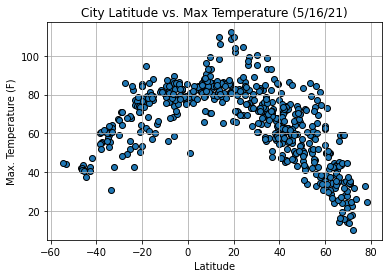

In [56]:
latitude=df.iloc[:, 1]
temperature=df.iloc[:, 3]


# Plot
plt.scatter(latitude, temperature, edgecolors='black')
plt.title('City Latitude vs. Max Temperature (5/16/21)')
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature (F)')
plt.grid()
plt.savefig("scatter_lat_temp.png")
plt.show()


## Latitude vs. Humidity Plot

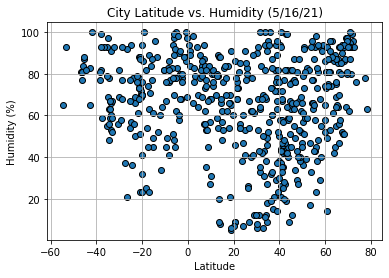

In [57]:
humidity=df.iloc[:, 4]
plt.scatter(latitude,humidity, edgecolors="black")
plt.title('City Latitude vs. Humidity (5/16/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("scatter_lat_humid.png")
plt.show()

## Latitude vs. Cloudiness Plot

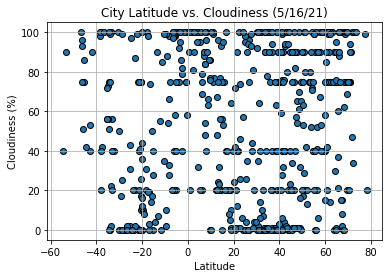

In [58]:
cloud = df.iloc[:, 5]
plt.scatter(latitude,cloud, edgecolors="black")
plt.title('City Latitude vs. Cloudiness (5/16/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("scatter_lat_cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

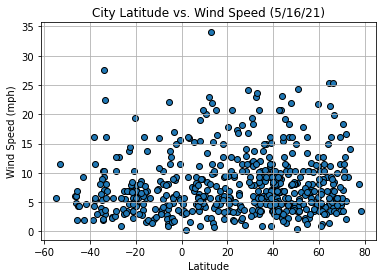

In [59]:
wind=df.iloc[:, 6]
plt.scatter(latitude,wind, edgecolors="black")
plt.title('City Latitude vs. Wind Speed (5/16/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("scatter_lat_wind.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6449493299322966


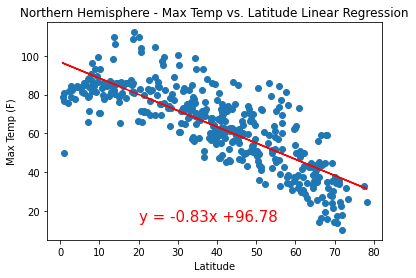

In [60]:
northern_hemisphere = df.loc[df['lat']>0]
northern_hemisphere

n_lat=northern_hemisphere.iloc[:, 1]
n_temp=northern_hemisphere.iloc[:, 3]

(slope, intercept, rvalue, pvalue, stderr)=linregress(n_lat, n_temp)
regress_values = n_lat * slope + intercept

plt.scatter(n_lat, n_temp)
plt.plot(n_lat, regress_values, "r-")

print(f"The r-value is: {rvalue**2}")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("lr_northlat_temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5856467988057905


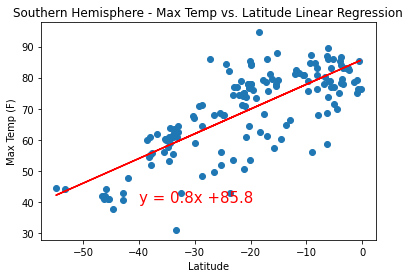

In [61]:
southern_hemisphere = df.loc[df['lat']<0]
southern_hemisphere

s_lat=southern_hemisphere.iloc[:, 1]
s_temp=southern_hemisphere.iloc[:, 3]

(slope, intercept, rvalue, pvalue, stderr)=linregress(s_lat, s_temp)
regress_values = s_lat * slope + intercept
plt.scatter(s_lat,s_temp)
plt.plot(s_lat, regress_values, "r-")

print(f"The r-value is: {rvalue**2}")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.savefig("lr_southlat_temp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.017563759421873375


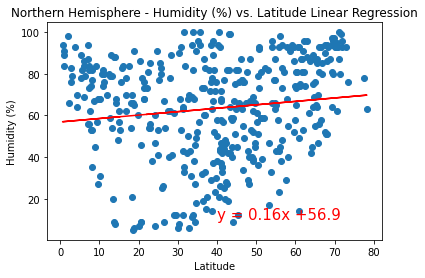

In [62]:
n_lat=northern_hemisphere.iloc[:, 1]
n_humidity=northern_hemisphere.iloc[:, 4]

(slope, intercept, rvalue, pvalue, stderr)=linregress(n_lat, n_humidity)
regress_values = n_lat * slope + intercept
plt.scatter(n_lat, n_humidity)
plt.plot(n_lat, regress_values, "r-")

print(f"The r-value is: {rvalue**2}")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.savefig("lr_northlat_humid.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 5.854213340163731e-05


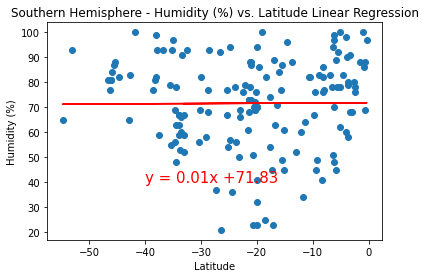

In [63]:
s_lat=southern_hemisphere.iloc[:, 1]
s_humidity=southern_hemisphere.iloc[:, 4]

(slope, intercept, rvalue, pvalue, stderr)=linregress(s_lat, s_humidity)
regress_values = s_lat * slope + intercept
plt.scatter(s_lat,s_humidity)
plt.plot(s_lat, regress_values, "r-")

print(f"The r-value is: {rvalue**2}")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.savefig("lr_southlat_humid.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.00406026897766283


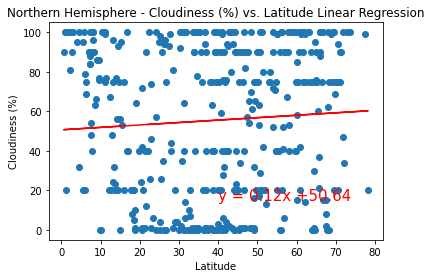

In [64]:
n_lat=northern_hemisphere.iloc[:, 1]
n_cloudiness=northern_hemisphere.iloc[:, 5]

(slope, intercept, rvalue, pvalue, stderr)=linregress(n_lat, n_cloudiness)
regress_values = n_lat * slope + intercept
plt.scatter(n_lat, n_cloudiness)
plt.plot(n_lat, regress_values, "r-")

print(f"The r-value is: {rvalue**2}")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.savefig("lr_northlat_cloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.01053894170601926


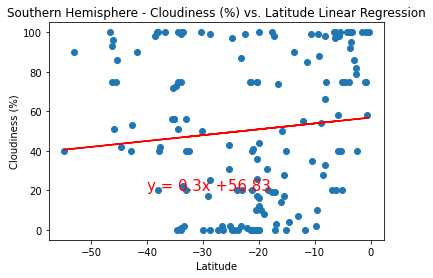

In [65]:
s_lat=southern_hemisphere.iloc[:, 1]
s_cloudiness=southern_hemisphere.iloc[:, 5]

(slope, intercept, rvalue, pvalue, stderr)=linregress(s_lat, s_cloudiness)
regress_values = s_lat * slope + intercept
plt.scatter(s_lat,s_cloudiness)
plt.plot(s_lat, regress_values, "r-")

print(f"The r-value is: {rvalue**2}")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.savefig("lr_southlat_cloud.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0009355498293259816


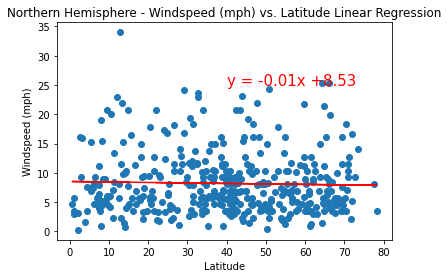

In [66]:
n_lat=northern_hemisphere.iloc[:, 1]
n_windspeed=northern_hemisphere.iloc[:, 6]

(slope, intercept, rvalue, pvalue, stderr)=linregress(n_lat, n_windspeed)
regress_values = n_lat * slope + intercept
plt.scatter(n_lat, n_windspeed)
plt.plot(n_lat, regress_values, "r-")

print(f"The r-value is: {rvalue**2}")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.title("Northern Hemisphere - Windspeed (mph) vs. Latitude Linear Regression")
plt.savefig("lr_northlat_wind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0006156864273222136


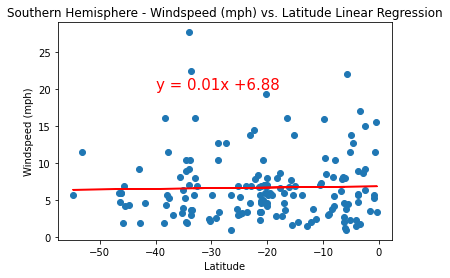

In [67]:
s_lat=southern_hemisphere.iloc[:, 1]
s_windspeed=southern_hemisphere.iloc[:, 6]

(slope, intercept, rvalue, pvalue, stderr)=linregress(s_lat, s_windspeed)
regress_values = s_lat * slope + intercept
plt.scatter(s_lat,s_windspeed)
plt.plot(s_lat, regress_values, "r-")

print(f"The r-value is: {rvalue**2}")

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.title("Southern Hemisphere - Windspeed (mph) vs. Latitude Linear Regression")
plt.savefig("lr_southlat_wind.png")
plt.show()